<font size="5">Section 2: non linear models</font>

### Housekeeping

#### import libraries

Pandas for data management, statsmodels, numpy and sklearn for analysis, matplotlib for visualization. Other libraries as needed for specific tasks (e.g. semopy for SEM). Remember to use the bash terminal or the enviroment manager to add libraries.

#### read data

Read data files using pandas as noted below. We can clean and organize data in many ways (for example, using the **dropna** command over a dataset).

#### describe data

There are many was to analyze data and do descriptive statistics. A good command to start is ***head***, to describe a section of the data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import nbinom
import seaborn as sns

%matplotlib inline

In [2]:
# higher ed data
cned = pd.read_csv('../data/cned.csv')
cned.dropna(inplace=True)


In [3]:
cned.reset_index(drop=True, inplace=True)
cned.head()

,region,idc,puntaje,nem,ingreso2,vacantes,ingreso,year,stem,area
0,7,7404,713.0,645.0,26.0,38.0,138,2019,0,Art/Humanities
1,7,7405,643.0,637.0,28.0,39.0,104,2019,0,Art/Humanities
2,7,7402,674.0,692.0,278.0,314.0,1318,2019,0,Art/Humanities
3,7,7406,663.0,655.0,79.0,103.0,438,2019,0,Art/Humanities
4,7,7408,642.0,610.0,41.0,59.0,148,2019,0,Art/Humanities


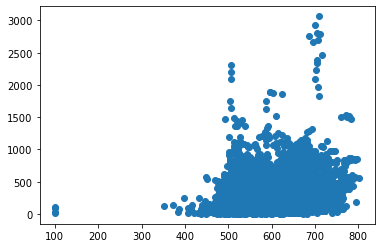

In [6]:
plt.scatter(cned['nem'],cned['ingreso'])

### OLS

We can use statsmodels to estimate a simple OLS regression (linear probability model). 

In [10]:
y=cned['stem']
X=cned[['puntaje','nem','vacantes','year']]
X=sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   stem   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.016
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           0.000490
Time:                        14:47:41   Log-Likelihood:                -5919.4
No. Observations:                9065   AIC:                         1.185e+04
Df Residuals:                    9060   BIC:                         1.188e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9501      4.999      1.990      0.0

### Probit



In [11]:
model = sm.Probit(y, X)
probit_model = model.fit()
print(probit_model.summary())

mfx = probit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.623654
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                   stem   No. Observations:                 9065
Model:                         Probit   Df Residuals:                     9060
Method:                           MLE   Df Model:                            4
Date:                Thu, 21 Jul 2022   Pseudo R-squ.:                0.001818
Time:                        22:34:51   Log-Likelihood:                -5653.4
converged:                       True   LL-Null:                       -5663.7
Covariance Type:            nonrobust   LLR p-value:                 0.0003804
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.6035     14.039      1.895      0.058      -0.912      54.119
puntaje        0.0010      0.

### Logit

In [12]:
model = sm.Logit(y, X)
logit_model = model.fit()
print(logit_model.summary())

mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.623656
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   stem   No. Observations:                 9065
Model:                          Logit   Df Residuals:                     9060
Method:                           MLE   Df Model:                            4
Date:                Thu, 21 Jul 2022   Pseudo R-squ.:                0.001816
Time:                        22:34:57   Log-Likelihood:                -5653.4
converged:                       True   LL-Null:                       -5663.7
Covariance Type:            nonrobust   LLR p-value:                 0.0003859
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8868     23.134      1.897      0.058      -1.455      89.229
puntaje        0.0015      0.

### Poisson

0    138
1    104
3    438
4    148
5    383
Name: ingreso, dtype: int64

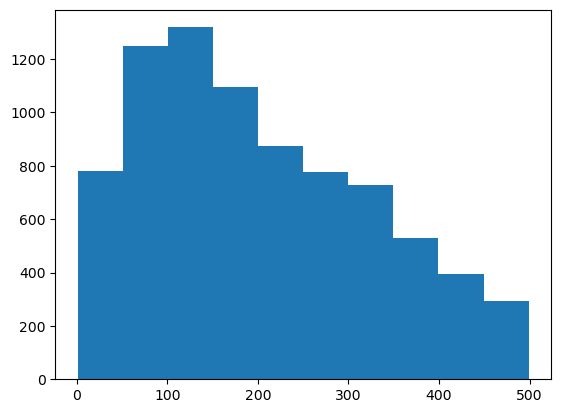

In [6]:
subset=cned.loc[cned['ingreso']<500]
y=subset['ingreso']
X=subset[['puntaje','nem','vacantes','year']]
plt.hist(subset.ingreso)
subset.ingreso.head()

In [7]:
poisson=sm.GLM(y,X,family=sm.families.Poisson()).fit()
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ingreso   No. Observations:                 8041
Model:                            GLM   Df Residuals:                     8037
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0395e+05
Date:                Mon, 26 Sep 2022   Deviance:                   3.5249e+05
Time:                        10:16:58   Pearson chi2:                 3.16e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
puntaje        0.0002   3.49e-05      5.285      0.0

In [8]:
print("fitted lambda")
print(poisson.mu)

fitted lambda
[208.98645684 203.53777853 438.06479834 ...  81.22697075  96.58979789
  95.13085338]


### Negative Binomial

In [10]:
negbin=sm.GLM(y,X,family=sm.families.NegativeBinomial()).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ingreso   No. Observations:                 8041
Model:                            GLM   Df Residuals:                     8037
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -49790.
Date:                Mon, 26 Sep 2022   Deviance:                       2200.2
Time:                        10:49:21   Pearson chi2:                 1.56e+03
No. Iterations:                    12   Pseudo R-squ. (CS):             0.2119
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
puntaje        0.0002      0.000      0.355      0.7

In [10]:
print("fitted lambda")
print(negbin.mu)

fitted lambda
[124.73205222 121.41207007 154.07280363 ...  68.35326312  73.99860129
  71.20441307]


### Test overdispersion

A simple test for overdispersion can be determined with the results of the Poisson model, using the ratio of Pearson chi2 / Df Residuals. A value larger than 1 indicates overdispersion. In the case above (6), data suggets overdispersion.

The Negative Binomial model estimated above is using a value of $\theta$ (or $\alpha=1/\theta$) equal to 1. In order to determine the appropiate value of $\alpha$, you can estimate a simple regression using the output of the Poisson model:

1. Construct the following variable aux=$[(y-\lambda)^2-\lambda]/\lambda$
2. Regress the variable aux with $\lambda$ as the only explanatory variable (no constant)
3. The estimated value is an appropiate guess for $\alpha=1/\theta$

In the model of the previous section, just use the options on sm.families.NegativeBinomial, in order to manually enter the value of alpha. See example below.

In [9]:
aux=((y-poisson.mu)**2-poisson.mu)/poisson.mu
auxr=sm.OLS(aux,poisson.mu).fit()
print(auxr.summary())

                                 OLS Regression Results                                
Dep. Variable:                ingreso   R-squared (uncentered):                   0.396
Model:                            OLS   Adj. R-squared (uncentered):              0.396
Method:                 Least Squares   F-statistic:                              5275.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                        0.00
Time:                        10:17:03   Log-Likelihood:                         -44571.
No. Observations:                8041   AIC:                                  8.914e+04
Df Residuals:                    8040   BIC:                                  8.915e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
negbin=sm.GLM(y,X,family=sm.families.NegativeBinomial(alpha=0.22)).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ingreso   No. Observations:                 8041
Model:                            GLM   Df Residuals:                     8037
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47029.
Date:                Thu, 08 Sep 2022   Deviance:                       9596.2
Time:                        21:53:44   Pearson chi2:                 6.89e+03
No. Iterations:                    13   Pseudo R-squ. (CS):             0.6530
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
puntaje        0.0001      0.000      0.649      0.5

<font size="3">**Tarea 1**</font>

<u> *Instrucciones* </u>

Los resultados de los ejericicios propuestos se deben entregar como un notebook por correo electronico a *juancaros@udec.cl* a mas tardar el dia 11/04/23 hasta las 21:00. 

Es importante considerar que el código debe poder ejecutarse en cualquier computadora con la data original del repositorio. Recordar la convencion para el nombre de archivo ademas de incluir en su documento titulos y encabezados por seccion. La data a utilizar es **charls2.csv**.

Las variables tienen la siguiente descripcion:

- retin: 1 si planea planea retirarse
- retage: cuando planea retirarse, medido en años desde la fecha de encuesta (0 implica retirado/a o no planea retirarse)
- cesd: puntaje en la escala de salud mental (0-30)
- child: numero de hijos
- drinly: bebio el ultimo mes (binario)
- hrsusu: horas promedio trabajo diario
- hsize: tamano del hogar
- female: 1 si es mujer, 0 si es hombre
- intmonth: mes en que fue encuestado/a (1-12)
- married: si esta casado/a (binario)
- retired: 1 si esta retirado/a (binario)
- schadj: años de escolaridad
- urban: zona urbana (binario)
- wealth: riqueza neta (miles RMB)
- age: edad al entrar a la encuesta


Preguntas:



1. Cargar la base de datos *charls2.csv* en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 

**R:**  Se ajusto drinkly como variable numerica y se paso wealth a logs, ademas de agregar una variable que indica cuando wealth no existe, dwealth (se podria haber hecho lo mismo con cesd). En general solo se ven valores extremos en wealth, pero no amerita clasificarlos como outliers.

In [100]:
charls = pd.read_csv('../data/charls2.csv')
charls = charls.replace({'.r': np.nan, '.m': np.nan, '.d': np.nan})
charls['drinkly'] = charls['drinkly'].astype(float)
charls['wealth']=charls['wealth']/100000
charls['dwealth']=0
charls.loc[charls['wealth'].isnull(), 'dwealth'] = 1
charls['lwealth']=np.log(charls['wealth']-charls['wealth'].min()+0.1)
charls.loc[charls['lwealth'].isnull(), 'lwealth'] = 0
charls.reset_index(drop=True, inplace=True)
charls.describe()

,age,cesd,child,drinkly,female,hrsusu,hsize,intmonth,married,retage,retin,retired,schadj,urban,wealth,dwealth,lwealth
count,9456.000000,8802.000000,9456.000000,9418.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000,8590.000000,9456.000000,9456.000000
mean,58.087035,9.034992,2.751586,0.334678,0.525275,2.552777,3.758249,7.495347,0.885364,1.390969,0.152602,0.183376,4.100888,0.213832,0.013671,0.091582,2.100429
std,9.462629,6.462808,1.400139,0.471903,0.499387,1.802885,1.823791,1.009306,0.318599,4.102102,0.359622,0.386995,3.574570,0.410032,0.431023,0.288450,0.671585
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,-2.302585
25%,50.000000,4.000000,2.000000,0.000000,0.000000,0.000000,2.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.312535
50%,57.000000,8.000000,2.000000,0.000000,1.000000,3.555348,3.000000,7.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.004000,0.000000,2.312832
75%,64.000000,13.000000,3.000000,1.000000,1.000000,4.025352,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.021875,0.000000,2.314514
max,100.000000,30.000000,10.000000,1.000000,1.000000,5.123964,16.000000,12.000000,1.000000,37.000000,1.000000,1.000000,16.000000,1.000000,9.001000,1.000000,2.949741


<Axes: >

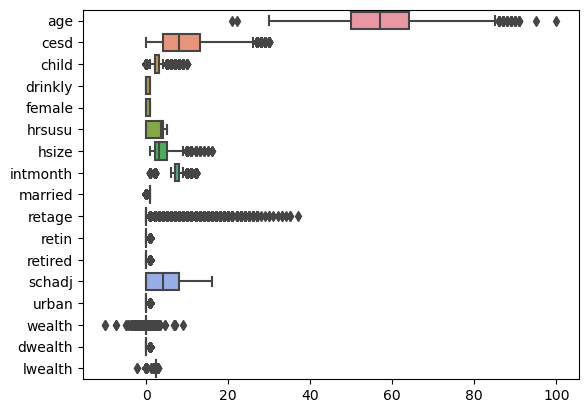

In [101]:
sns.boxplot(data=charls, orient='h')


2. Ejecute un modelo de probabilidad lineal (*MCO*) que permita explicar la probabilidad de que una persona que aun trabaja quiera retirarse (*retin*). Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

**R:** Se excluye intmonth por ser irrelevante, y se excluyen aquellas observaciones que no tienen valor en wealth (al tratar de agregarlas con una variable dummy dwealth, se encuentra el mismo resultado, por lo cual no aportan al analisis). En vista de lo estimado, Aspectos socioeconomicos y de genero influyen en la probabilidad de querer retirarse (condicional en estar trabajando). Por ejemplo, mujeres tienen 4% menor probabilidad de querer retirarse, y la probabilidad incrementa en 0,78% por año de escolaridad. Otros aspectos demograficos no son relevantes, sin embargo aquellos que declaran beber en el mes pasado tambien son mas probables de querer retirarse (2,3%). 

In [102]:
charls.reset_index(drop=True, inplace=True)
X=charls[charls['retired'] == 0].reset_index(drop=True)
X=X[['retin','age', 'cesd', 'child', 'drinkly', 'female', 'hsize','married', 'hrsusu', 'schadj', 'urban','lwealth']]
X.dropna(inplace=True)
y=X['retin']
X=X[['age', 'cesd', 'child', 'drinkly', 'female', 'hsize','married', 'hrsusu', 'schadj', 'urban','lwealth']]
X=sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit(cov_type='HC0')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  retin   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     12.25
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           3.33e-23
Time:                        12:33:26   Log-Likelihood:                -3541.6
No. Observations:                7194   AIC:                             7107.
Df Residuals:                    7182   BIC:                             7190.
Df Model:                          11                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1719      0.052      3.274      0.0

3. Ejecute un modelo *probit* para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

**R:** Notar que los resultados son bastante similares a OLS, aunque la precision en algunas variables es menor, como drinkly. Al mirar los efectos marginales, los resultados son arbitrariamente identicos.

In [82]:
model = sm.Logit(y, X)
results = model.fit(cov_type='HC0')
print(results.summary())
mfx = results.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.490314
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  retin   No. Observations:                 7194
Model:                          Logit   Df Residuals:                     7182
Method:                           MLE   Df Model:                           11
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:                 0.01872
Time:                        12:22:13   Log-Likelihood:                -3527.3
converged:                       True   LL-Null:                       -3594.6
Covariance Type:                  HC0   LLR p-value:                 2.027e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5935      0.346     -4.604      0.000      -2.272      -0.915
age           -0.0044      0.

4. Ejecute un modelo *logit*  para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

**R:** Nuevamente hay diferencias numericas minimas entre cada modelo, pero los resultados son virtualmente identicos entre LPM, Probit y Logit.

In [103]:
model = sm.Probit(y, X)
results = model.fit(cov_type='HC0')
print(results.summary())
mfx = results.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.490366
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                  retin   No. Observations:                 7194
Model:                         Probit   Df Residuals:                     7182
Method:                           MLE   Df Model:                           11
Date:                Mon, 24 Apr 2023   Pseudo R-squ.:                 0.01862
Time:                        12:33:51   Log-Likelihood:                -3527.7
converged:                       True   LL-Null:                       -3594.6
Covariance Type:                  HC0   LLR p-value:                 2.886e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9547      0.196     -4.880      0.000      -1.338      -0.571
age           -0.0026      0.

5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

**R**: Ante las minimas diferencias entre los distintos metodos, no hay preferencia entre Probit y Logit, pero LPM es inferior dado que producira predicciones fuera del intervalo de interes. En cualquier caso, dado que el modelo no es causal, podemos inferir que el set de variables disponibles explica una fraccion muy menor de la intencion de retirarse, y en virtud de aquello, las predicciones del modelo seran poco confiables.

6. Ejecute un modelo Poisson para explicar cuando planea retirarse las personas que planean hacerlo. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

**R**: Nos quedamos solo con aquellos que desean retirarse (retin=1), y luego usamos el mismo set de datos de las preguntas anteriores. A diferencia de la probabilidad de querer retirarse, multiples factores tienen impacto en la edad esperada de retiro, algunos obvios como edad y caracteristicas laborales, y otros menos obvios como la zona urbana y tamano del hogar. Por ejemplo, la edad esperada de retiro (en años) se reduce en 0.17 (años) si las personas viven en zona rural, y disminuye 0.05 anios por cada anio que el individuo es mayor (que el promedio).

count    1435.000000
mean        9.108711
std         6.325825
min         1.000000
25%         4.000000
50%         8.000000
75%        13.000000
max        37.000000
Name: retage, dtype: float64

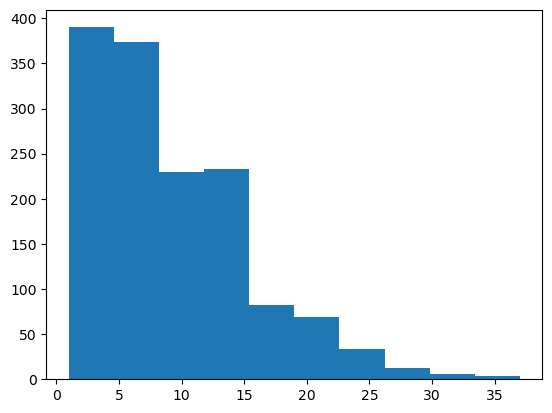

In [110]:
charls.reset_index(drop=True, inplace=True)
X=charls[charls['retired'] == 0].reset_index(drop=True)
X=charls[charls['retin'] != 0].reset_index(drop=True)
X=X[['retage','age', 'cesd', 'child', 'drinkly', 'female', 'hsize','married', 'hrsusu', 'schadj', 'urban','lwealth']]
X.dropna(inplace=True)
y=X['retage']
X=X[['age', 'cesd', 'child', 'drinkly', 'female', 'hsize','married', 'hrsusu', 'schadj', 'urban','lwealth']]
X=sm.add_constant(X)
plt.hist(y)
y.describe()

In [107]:
poisson=sm.GLM(y,X,family=sm.families.Poisson()).fit()
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 retage   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1423
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4816.1
Date:                Mon, 24 Apr 2023   Deviance:                       4188.1
Time:                        13:50:19   Pearson chi2:                 4.22e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7425
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9125      0.102     48.327      0.0

7. Determine sobre dispersion y posible valor optimo de alpha para un modelo Binomial Negativa.

**R**: En virtud de los resultados, podemos ver que existe cierta evidencia de sobredispersion (Pearson Chi2 sobre los Df residuos da un valor de 2.96). Al correr el test de sobredispersion vemos que el valor es estadisticamente distinto de 1, confirmando lo anterior.

In [112]:
aux=((y-poisson.mu)**2-poisson.mu)/poisson.mu
auxr=sm.OLS(aux,poisson.mu).fit()
print(auxr.summary())

                                 OLS Regression Results                                
Dep. Variable:                 retage   R-squared (uncentered):                   0.127
Model:                            OLS   Adj. R-squared (uncentered):              0.126
Method:                 Least Squares   F-statistic:                              208.8
Date:                Mon, 24 Apr 2023   Prob (F-statistic):                    2.76e-44
Time:                        14:01:56   Log-Likelihood:                         -4375.3
No. Observations:                1435   AIC:                                      8753.
Df Residuals:                    1434   BIC:                                      8758.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para explicar cuando las personas desean retirarse, de querer hacerlo. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

**R**: El modelo de Binomial Negativa entrega resultados en general muy similares a Poisson, sin embargo hay diferencias significativas en algunas variables como (log) wealth, drinkly y hrsusu. Dados los resultados, se observa que las variables demograficas son aquellas que influencian la decision de edad de retiro.

In [113]:
negbin=sm.GLM(y,X,family=sm.families.NegativeBinomial(alpha=0.2)).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 retage   No. Observations:                 1435
Model:                            GLM   Df Residuals:                     1423
Model Family:        NegativeBinomial   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4206.9
Date:                Mon, 24 Apr 2023   Deviance:                       1590.6
Time:                        14:02:13   Pearson chi2:                 1.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0289      0.173     29.065      0.0

9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

**R**: Dada la sobredispersion, los modelos Poisson y Binomial Negativa producen diferencias importantes, afectando la significancia de algunos parametros. En virtud de aquello, se favorece la Binomial Negativa, ya que el supuesto de media igual a a varianza no se cumpliria. En cualquier caso, las variables de edad, tamano de hogar y zona urbana son robustas a la especificacion (significativas en ambos modelos). 

<font size="3">**Tarea 1 2024 (Pauta)**</font>

<u> *Instrucciones* </u>

Es importante considerar que el código debe poder ejecutarse en cualquier computadora con la data original del repositorio. Recordar la convencion para el nombre de archivo ademas de incluir en su documento titulos y encabezados por seccion. La data a utilizar es **disease.csv**.

Las variables tienen la siguiente descripcion:

Glucose: This is the level of glucose in the blood, measured in milligrams per deciliter (mg/dL)

Cholesterol: This is the level of cholesterol in the blood, measured in milligrams per deciliter (mg/dL)

Hemoglobin: This is the protein in red blood cells that carries oxygen from the lungs to the rest of the body

Platelets: Platelets are blood cells that help with clotting

White Blood Cells (WBC): These are cells of the immune system that help fight infections

Red Blood Cells (RBC): These are the cells that carry oxygen from the lungs to the rest of the body

Hematocrit: This is the percentage of blood volume that is occupied by red blood cells

Mean Corpuscular Volume (MCV): This is the average volume of red blood cells

Mean Corpuscular Hemoglobin (MCH): This is the average amount of hemoglobin in a red blood cell

Insulin: This is a hormone that helps regulate blood sugar levels

BMI (Body Mass Index): This is a measure of body fat based on height and weight

Systolic Blood Pressure (SBP): This is the pressure in the arteries when the heart beats

Diastolic Blood Pressure (BP): This is the pressure in the arteries when the heart is at rest between beats

Triglycerides: These are a type of fat found in the blood, measured in milligrams per deciliter (mg/dL)

HbA1c (Glycated Hemoglobin): This is a measure of average blood sugar levels over the past two to three months

LDL (Low-Density Lipoprotein) Cholesterol: This is the "bad" cholesterol that can build up in the arteries

HDL (High-Density Lipoprotein) Cholesterol: This is the "good" cholesterol that helps remove LDL cholesterol from the arteries

Heart Rate: This is the number of heartbeats per minute (bpm)

Creatinine: This is a waste product produced by muscles and filtered out of the blood by the kidneys

C-reactive Protein (CRP): This is a marker of inflammation in the body

Disease: This indicates the number of diseases (0 indicates healthy)

Preguntas:

1. Cargar la base de datos *disease.csv* en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario.

**R**: En este caso particular solo era necesario generar una variable binaria a partir de *Disease*, mientras que la matriz de correlaciones permite analizar que variables podrian excluirse del modelo.

In [ ]:
df = pd.read_csv('../data/disease.csv')
df['dd'] = df['Disease'].apply(lambda x: 1 if x > 0 else 0)
df = df.rename(columns={"Mean Corpuscular Volume": "MCV", 
                        "Mean Corpuscular Hemoglobin": "MCH",
                        "Diastolic Blood Pressure": "BP",
                        "HDL Cholesterol": "HDL Chol",
                        "LDL Cholesterol": "LDL Chol"})
df.dropna(inplace=True)
df.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,MCV,MCH,Insulin,...,BP,Triglycerides,HbA1c,LDL Chol,HDL Chol,Heart Rate,Creatinine,C-reactive Protein,Disease,dd
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.447062,...,0.421708,0.374373,0.439112,0.421777,0.546079,0.582255,0.425075,0.430308,1.583156,0.763505
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.242861,...,0.248768,0.256981,0.263779,0.252124,0.269511,0.250915,0.229298,0.243034,1.209799,0.425020
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.034129,...,0.005579,0.005217,0.016256,0.033037,0.039505,0.114550,0.021239,0.004867,0.000000,0.000000
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.219111,...,0.175469,0.184604,0.188750,0.217757,0.307132,0.339125,0.213026,0.196192,1.000000,1.000000
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.444806,...,0.474378,0.317857,0.466375,0.413071,0.512941,0.610860,0.417295,0.481601,1.000000,1.000000
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.654441,...,0.663382,0.572330,0.652514,0.604753,0.779378,0.800666,0.606719,0.631426,3.000000,1.000000
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.966784,...,0.934617,0.973679,0.950218,0.983826,0.989411,0.996873,0.925924,0.797906,4.000000,1.000000


<Axes: >

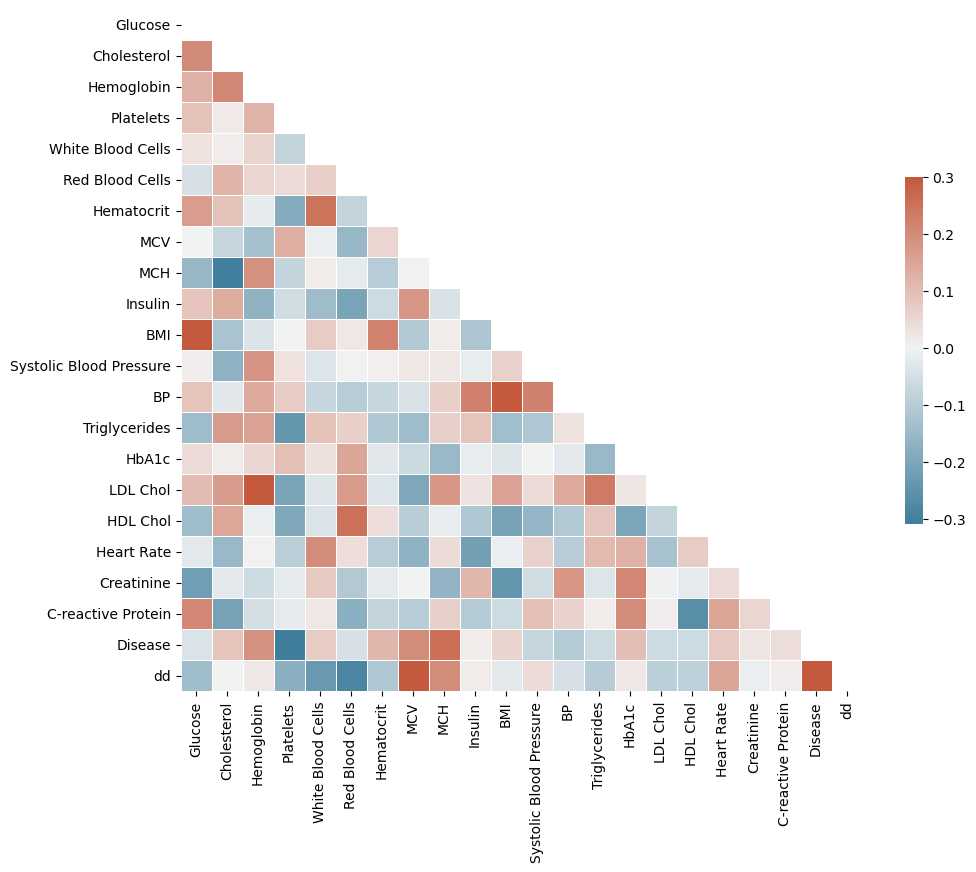

In [ ]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


2. Ejecute un modelo de probabilidad lineal (*MCO*) que permita explicar la probabilidad de que una persona tenga al menos una enfermedad. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

**R**: Segun el modelo, excluyendo las variables que no contribuyen dada alta correlacion, el BMI y ritmo cardiaco se asocian positivamente de forma importante a la probabilidad de tener alguna morbilidad, asi como el colesterol total y ciertas caracteristicas de la sangre (MCV, MCH). De la misma manera, otros marcadores bioquimicos indican una asociacion negativa, tales como la glucosa, los trigliceridos y la insulina. Los resultados se interpretan como cambio en puntos porcentuales por cambio de una unidad en la variable (escala de 0 a 100). Por ejemplo, un cambio de una unidad en colesterol total indica un cambio de 0.5 puntos porcentuales en la probabilidad de tener al menos una enfermedad. 

In [ ]:
#Regresion excluyendo variables de alta correlacion
y=df['dd']
X=df.drop(['Disease', 'dd','Systolic Blood Pressure','Creatinine'], axis=1)
X=X*100
X=sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit(cov_type='HC0')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     dd   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     236.2
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:47:44   Log-Likelihood:                -539.42
No. Observations:                2351   AIC:                             1117.
Df Residuals:                    2332   BIC:                             1226.
Df Model:                          18                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7573      0

3. Ejecute un modelo *probit* para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

**R**: Hay cambios importantes de magnitud en los efectos marginales (considerando a OLS), las asociaciones aumentan (en valor absoluto), en particular para variables como glucosa, colesterol y plaquetas. Un cambio de una unidad, en torno al promedio (en otras palabras un percentil en la distribucion), se traduce en cambios de una un punto porcentual, en promedio. Esta interpretacion permite entender de mejor manera un incremento relativo (en torno a la media) de un percentil sobre el riesgo (medido en porcentaje).

In [ ]:
X1 = X.drop(['LDL Chol','Insulin'], axis=1)
model = sm.Probit(y, X1)
probit_model = model.fit(cov_type='HC0')
print(probit_model.summary())

mfxp = probit_model.get_margeff()
print(mfxp.summary())

Optimization terminated successfully.
         Current function value: 0.169501
         Iterations 12
                          Probit Regression Results                           
Dep. Variable:                     dd   No. Observations:                 2351
Model:                         Probit   Df Residuals:                     2334
Method:                           MLE   Df Model:                           16
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.6901
Time:                        14:47:44   Log-Likelihood:                -398.50
converged:                       True   LL-Null:                       -1286.0
Covariance Type:                  HC0   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.2068      0.671     10.745      0.000       5.892       8.521
Gluc

4. Ejecute un modelo *logit*  para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

**R**: Los cambios en los coeficientes estimados con Probit (en terminos de efectos marginales) no son estadisticamente significativos, lo cual es esperado. Sin embargo, logit permite entender tambien los cambios en riesgo relativo (odds ratio) de tener al menos una enfermadad (reportado en la ultima tabla).

In [ ]:
X1 = X.drop(['LDL Chol','Insulin'], axis=1)
model = sm.Logit(y, X1)
logit_model = model.fit(cov_type='HC0')
print(logit_model.summary())

mfxl = logit_model.get_margeff()
print(mfxl.summary())

params = logit_model.params
conf = logit_model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['Odds Ratio', '5%', '95%']
print("Odds Ratios")
print(np.exp(conf).iloc[1:17 , ])


Optimization terminated successfully.
         Current function value: 0.168140
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                     dd   No. Observations:                 2351
Model:                          Logit   Df Residuals:                     2334
Method:                           MLE   Df Model:                           16
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.6926
Time:                        14:47:45   Log-Likelihood:                -395.30
converged:                       True   LL-Null:                       -1286.0
Covariance Type:                  HC0   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.6531      1.048     12.069      0.000      10.598      14.708
Gluc

5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

**R**: En base a los resultados, el modelo MCO produce resultados incorrectos, por tanto Probit o Logit podrian ser apropiados. Dado el contexto, el modelo Logit provee mas informacion, por tanto es mas conveniente. Hay solo algunas variables como Insulina, LDL Chol, Creatinina y BP Sistolica no afectan directamente (teniendo en cuenta que el modelo puede estar mal especificado al no permitir interacciones entre variables).

In [ ]:
#Estimar modelo con las mismas variables anteriores
model = sm.OLS(y, X1)
results = model.fit(cov_type='HC0')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     dd   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     214.8
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:47:45   Log-Likelihood:                -566.18
No. Observations:                2351   AIC:                             1166.
Df Residuals:                    2334   BIC:                             1264.
Df Model:                          16                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6200      0

6. Ejecute un modelo Poisson para explicar el numero de enfermedades que tiene una persona. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

**R**: Una vez excluidas las variables que no contribuian a la varianza total del modelo (tampoco directamente), hay ciertas variables que contribuyen de forma significativa, aunque de magnitud menor, a la variacion en el numero de enfermedades contabilizadas. Por ejemplo, un incremento en 10 percentiles en el Indice de Masa Corporal (BMI) se traduce en un incremento (sobre el promedio) de 0.14 en el numero de enfermedades.

In [ ]:
y = df['Disease']
X2=df.drop(['Disease', 'dd','White Blood Cells','Red Blood Cells','Insulin'], axis=1)
X2 = X2*100
X2=sm.add_constant(X2)
poisson=sm.GLM(y,X2,family=sm.families.Poisson()).fit()
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Disease   No. Observations:                 2351
Model:                            GLM   Df Residuals:                     2333
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3133.6
Date:                Thu, 24 Apr 2025   Deviance:                       1685.3
Time:                        14:47:45   Pearson chi2:                 1.31e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3767
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

7. Determine la existencia de sobre dispersion y posible valor optimo de alpha para un modelo Binomial Negativa.

**R**: El analisis indica que la sobredispersion es baja, y el test muestra un valor de alpha estadisticamente significativo, pero sugiriendo que existe subdispersion (menor varianza que la media). 

<Axes: xlabel='plambda', ylabel='Count'>

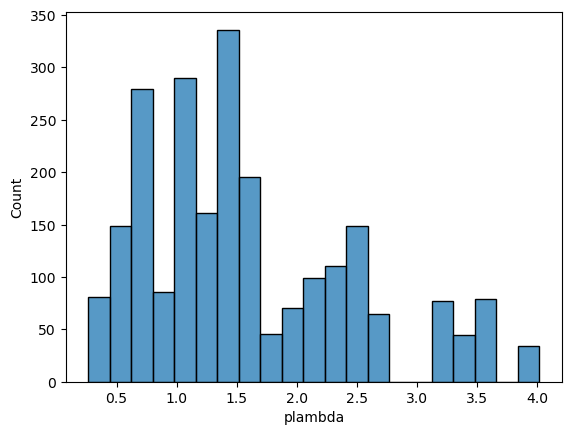

In [ ]:
df['plambda'] = poisson.mu
sns.histplot(data=df, x="plambda")

In [ ]:
aux=((y-poisson.mu)**2-poisson.mu)/poisson.mu
auxr=sm.OLS(aux,poisson.mu).fit()
print(auxr.summary())

                                 OLS Regression Results                                
Dep. Variable:                Disease   R-squared (uncentered):                   0.381
Model:                            OLS   Adj. R-squared (uncentered):              0.381
Method:                 Least Squares   F-statistic:                              1449.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):                   1.97e-247
Time:                        14:47:45   Log-Likelihood:                         -2008.7
No. Observations:                2351   AIC:                                      4019.
Df Residuals:                    2350   BIC:                                      4025.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para responder la pregunta 6. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado.

**R**: Los resultados del modelo Binonial Negativa, con el valor de alpha sugerido en la regresion auxiliar, entrega un peor ajuste respecto del modelo Poisson (basado en el valor de la Log-Likelihood). Sin embargo, los valores estimados son arbitrariamente similares entre ambos modelos (y su interpretacion es exactamente la misma).

In [ ]:
negbin=sm.GLM(y,X2,family=sm.families.NegativeBinomial()).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Disease   No. Observations:                 2351
Model:                            GLM   Df Residuals:                     2333
Model Family:        NegativeBinomial   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3811.6
Date:                Thu, 24 Apr 2025   Deviance:                       928.30
Time:                        14:47:54   Pearson chi2:                     605.
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1859
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

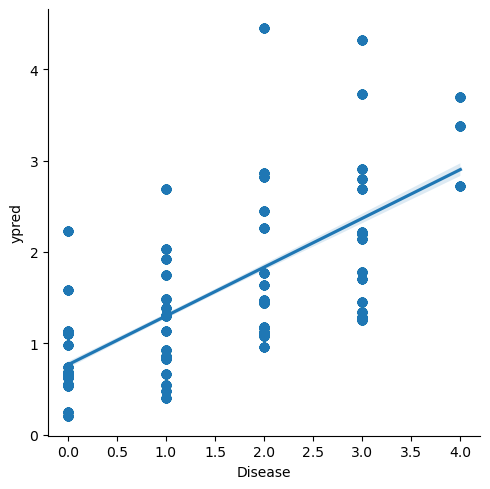

In [ ]:
df['ypred'] = negbin.predict(X2)
sns.lmplot(data=df, x='Disease', y='ypred')

9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

**R**: En virtud de los resultados, ambos modelos entregan resultados similares, sin embargo el modelo Poisson es mas parsimonioso y explica una mayor fraccion de la varianza. La significancia de las variables en cada modelo son arbitrariamente similares (desde una perspectiva estadistica). Todas las variables que quedan en el modelo son robustas en su asociacion con el numero de enfermedades.